# Project 3 -- (MINDS THAT SPEAK, HEARTS THAT LISTEN)

### Scraping, Cleaning, EDA, and Modeling on Two Subreddits (r/Cardiology and r/Neuroscience):

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# API Functions and Loops:

In [80]:
#Imports:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer 
from sklearn.feature_extraction import text
from nltk import word_tokenize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import circlify
import spacy
import scattertext

In [153]:
# May need to pip install the following:
# %pip install circlify
%pip install altair vega_datasets

  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 KB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Testing the time it takes to run requests:
start = time.time()
url = 'https://api.pushshift.io/reddit/search/submission'
params2 = {'subreddit':'neuroscience', 'size': 100, "before": 1649606956}
res2 = requests.get(url, params2)
print(res2.status_code)
end = time.time()
print(end - start)

200
2.2132492065429688


In [4]:
#Testing the time it takes to create dataframes with 5 second delay:
start = time.time()
data2 = res2.json()
posts2 = data2['data']
df2 = pd.DataFrame(posts2)
print(len(posts2))
end = time.time()
print(end - start)

100
0.013909101486206055


In [5]:
#Finding first UTC code to initiate pull below:
df2['created_utc'].iloc[0]

1649601801

In [6]:
#Defining neuroscience dataframe:
neuro = pd.DataFrame()

In [7]:
#Function for api pull from neuroscience subreddit:
def apipuller(before):
    url = 'https://api.pushshift.io/reddit/search/submission'
    params = {'subreddit':'neuroscience', 'size': 100, 'before': before}
    res = requests.get(url, params)
    if res.status_code == 200:
        data = res.json()
    return pd.DataFrame(data['data'])

In [8]:
# #While loop for actually pulling posts from neuroscience subreddit:
# data = apipuller(1650821731)
# while len(data) > 0:
#     before = data.iloc[-1]['created_utc']
#     data = apipuller(before)
#     time.sleep(5)
#     neuro = pd.concat([neuro, data])

In [9]:
# #Saving full and abridged versions of neuroscience dataframe:
# neuro_small = neuro[['subreddit','title','selftext']]
# neuro.to_csv('./data/neuro_full.csv')
# neuro_small.to_csv('./data/neuro_small.csv')

In [10]:
#Reading in already scraped data:
neuro_small = pd.read_csv('./data/neuro_small.csv')

In [11]:
#Removing all nulls, '[removed]', and '[deleted]', prioritizing posts:
neuro_wst = neuro_small[neuro_small['selftext'] != '']
neuro_wst = neuro_wst.dropna()
neuro_wst = neuro_wst[neuro_wst['selftext'] != '[deleted]']
neuro_wst = neuro_wst[neuro_wst['selftext'] != '[removed]']
neuro_wst.shape

(4551, 4)

In [12]:
#Removing all nulls, '[removed]', and '[deleted]', prioritizing titles (makes no difference):
neuro_wt = neuro_small[neuro_small['title'] != '']
neuro_wt = neuro_wt[neuro_wt['title'] != '[deleted]']
neuro_wt = neuro_wt[neuro_wt['title'] != '[removed]']
neuro_small.shape, neuro_wt.shape

((17415, 4), (17415, 4))

In [13]:
# #Finding first UTC code to initiate next subreddit pull below:
# url = 'https://api.pushshift.io/reddit/search/submission'
# params = {'subreddit':'cardiology', 'size': 100}
# res = requests.get(url, params)
# data = res.json()
# posts = data['data']
# df = pd.DataFrame(posts)
# df['created_utc'].iloc[0]

In [14]:
#Defining cardiology dataframe:
cardio = pd.DataFrame()

In [15]:
#Function for api pull from cardiology subreddit:
def apipuller(before):
    url = 'https://api.pushshift.io/reddit/search/submission'
    params = {'subreddit':'cardiology', 'size': 100, 'before': before }
    res = requests.get(url, params)
    if res.status_code == 200:
        data = res.json()
        return pd.DataFrame(data['data'])

In [16]:
# #While loop for actually pulling posts from cardiology subreddit:
# data = apipuller(1648888595)
# while len(data) > 0:
#     before = data.iloc[-1]['created_utc']
#     data = apipuller(before)
#     time.sleep(5)
#     cardio = pd.concat([cardio, data])

In [17]:
# #Saving full and abridged versions of neuroscience dataframe:
# cardio_small = cardio[['subreddit','title','selftext']]
# cardio.to_csv('./data/cardio_full.csv')
# cardio_small.to_csv('./data/cardio_small.csv')

In [18]:
#Reading in already scraped data:
cardio_small = pd.read_csv('./data/cardio_small.csv')

In [19]:
#Removing all nulls, '[removed]', and '[deleted]', prioritizing posts:
cardio_wst = cardio_small[cardio_small['selftext'] != '']
cardio_wst = cardio_wst.dropna()
cardio_wst = cardio_wst[cardio_wst['selftext'] != '[deleted]']
cardio_wst = cardio_wst[cardio_wst['selftext'] != '[removed]']
cardio_wst.shape

(2502, 4)

In [20]:
#Removing all nulls, '[removed]', and '[deleted]', prioritizing titles (makes no difference):
cardio_wt = cardio_small[cardio_small['title'] != '']
cardio_wt = cardio_wt[cardio_wt['title'] != '[deleted]']
cardio_wt = cardio_wt[cardio_wt['title'] != '[removed]']
cardio_small.shape, cardio_wt.shape

((5812, 4), (5812, 4))

In [21]:
#Combining and saving cleaned dfs as one, prioritizing posts:
df_comb = pd.concat([neuro_wst, cardio_wst])
df_comb.to_csv('./data/df_comb.csv')

In [22]:
#Combining and saving cleaned dfs as one, prioritizing title:
df_comb_ttl = pd.concat([neuro_wt, cardio_wt])
df_comb_ttl.to_csv('./data/df_comb_ttl.csv')

In [23]:
#Subreddit ratios in cleaned post set:
df_comb['subreddit'].value_counts()

neuroscience    4551
Cardiology      2502
Name: subreddit, dtype: int64

In [67]:
#Subreddit ratios in cleaned title set:
df_comb_ttl['subreddit'].value_counts()

neuroscience    17415
Cardiology       5812
Name: subreddit, dtype: int64

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# EDA with Word and Character Count:

In [68]:
#Creating columns in combined self text df for word and charachter length of posts:
df_comb['selftext_word_count'] = [len(i.split(' ')) for i in df_comb['selftext']]
df_comb['selftext_length'] = [len(i) for i in df_comb['selftext']]

In [69]:
#Creating columns in combined title df for word and charachter length of titles:
df_comb_ttl['title_word_count'] = [len(i.split(' ')) for i in df_comb_ttl['title']]
df_comb_ttl['title_length'] = [len(i) for i in df_comb_ttl['title']]

In [70]:
print('The average post length in both subreddits is ' + str(round(df_comb['selftext_word_count'].mean())) + 
      ' words long, and ' + str(round(df_comb['selftext_length'].mean())) + ' characters long')
print('The average title length of both subreddits is ' + str(round(df_comb_ttl['title_word_count'].mean())) + 
      ' words long, and ' + str(round(df_comb_ttl['title_length'].mean())) + ' characters long')

The average post length in both subreddits is 115 words long, and 696 characters long
The average title length of both subreddits is 11 words long, and 72 characters long


In [71]:
print('The average post length in the Cardiology subreddit is ' + str(round(df_comb[df_comb['subreddit']=='Cardiology']['selftext_word_count'].mean())) + 
      ' words long, and ' + str(round(df_comb[df_comb['subreddit']=='Cardiology']['selftext_length'].mean())) + ' characters long')
print('The average title length of the Cardiology subreddit is ' + str(round(df_comb_ttl[df_comb_ttl['subreddit']=='Cardiology']['title_word_count'].mean())) + 
      ' words long, and ' + str(round(df_comb_ttl[df_comb_ttl['subreddit']=='Cardiology']['title_length'].mean())) + ' characters long')

The average post length in the Cardiology subreddit is 108 words long, and 624 characters long
The average title length of the Cardiology subreddit is 10 words long, and 60 characters long


In [72]:
print('The average post length of the Neuroscience subreddit is ' + str(round(df_comb[df_comb['subreddit']=='neuroscience']['selftext_word_count'].mean())) + 
      ' words long, and ' + str(round(df_comb[df_comb['subreddit']=='neuroscience']['selftext_length'].mean())) + ' characters long')
print('The average title length of the Neuroscience subreddit is ' + str(round(df_comb_ttl[df_comb_ttl['subreddit']=='neuroscience']['title_word_count'].mean())) + 
      ' words long, and ' + str(round(df_comb_ttl[df_comb_ttl['subreddit']=='neuroscience']['title_length'].mean())) + ' characters long')

The average post length of the Neuroscience subreddit is 119 words long, and 736 characters long
The average title length of the Neuroscience subreddit is 12 words long, and 75 characters long


### Neuroscience posts and titles appear to be slightly longer on average than those from the Cardiology subreddit, but not significantly so.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# EDA with Count Vectorized Training Set:

In [24]:
#Train test split for eventual post based modeling:
X = df_comb['selftext']
y = df_comb['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, stratify=y)

#Train test split for eventual title based modeling:
X_ttl = df_comb_ttl['title']
y_ttl = df_comb_ttl['subreddit']
X_train_ttl, X_test_ttl, y_train_ttl, y_test_ttl = train_test_split(X_ttl, y_ttl, random_state=123, stratify=y_ttl)

#Defining stop words list:
new_words = text.ENGLISH_STOP_WORDS.union(['https','http','com','et','al','reddit','nih','gov','feed_text','nlm','nih','imgur','ncbi','epa',
                                           'hashtag','en','source','org','wiki','wikipedia', 'www','youtube','watch','pmc','amp','auto','webp','__eep__'])

In [25]:
#Instantiation, fitting, transforming, and df creation of CV on post text:
cv = CountVectorizer(stop_words=new_words)
X_train_cv = cv.fit_transform(X_train)
df_train_st_cv = pd.DataFrame(X_train_cv.A, columns= cv.get_feature_names_out())

#Instantiation, fitting, transforming, and df creation of CV on title text:
cv2 = CountVectorizer(stop_words=new_words)
X_train_cv2 = cv2.fit_transform(X_train_ttl)
df_train_ttl_cv2 = pd.DataFrame(X_train_cv2.A, columns= cv2.get_feature_names_out())

In [26]:
#Checking y stratification (Subreddit Ratio):
y_train.value_counts()

neuroscience    3413
Cardiology      1876
Name: subreddit, dtype: int64

In [27]:
df_train_st_cv.shape, df_train_ttl_cv2.shape

((5289, 26481), (17420, 17298))

In [28]:
#Recombinging subreddit categorization to continue EDA by category:
eda_train = df_train_st_cv
eda_train['subreddit_real'] = list(y_train)
eda_train_ttl = df_train_ttl_cv2
eda_train_ttl['subreddit_real'] = list(y_train_ttl)

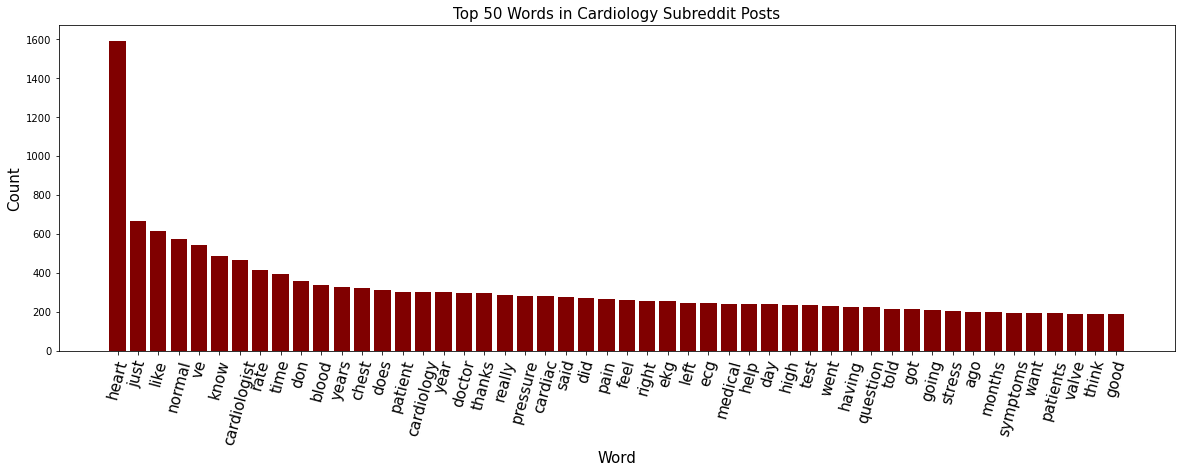

In [307]:
#Top 50 post words from Cardiology subreddit posts:
temp_df = pd.DataFrame(eda_train[eda_train['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(50))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='maroon');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Word', fontsize=15);
plt.title('Top 50 Words in Cardiology Subreddit Posts', fontsize=15);
plt.savefig('./visualizations/card_post_uni_50.png', transparent=True, bbox_inches = 'tight')


- Above bar plot shows the top 50 unigrams from all collected post text from r/Cardiology subreddit.
- Top 6 words include 'heart', 'just', 'like', 'normal', 'know', and 'cardiologist'.

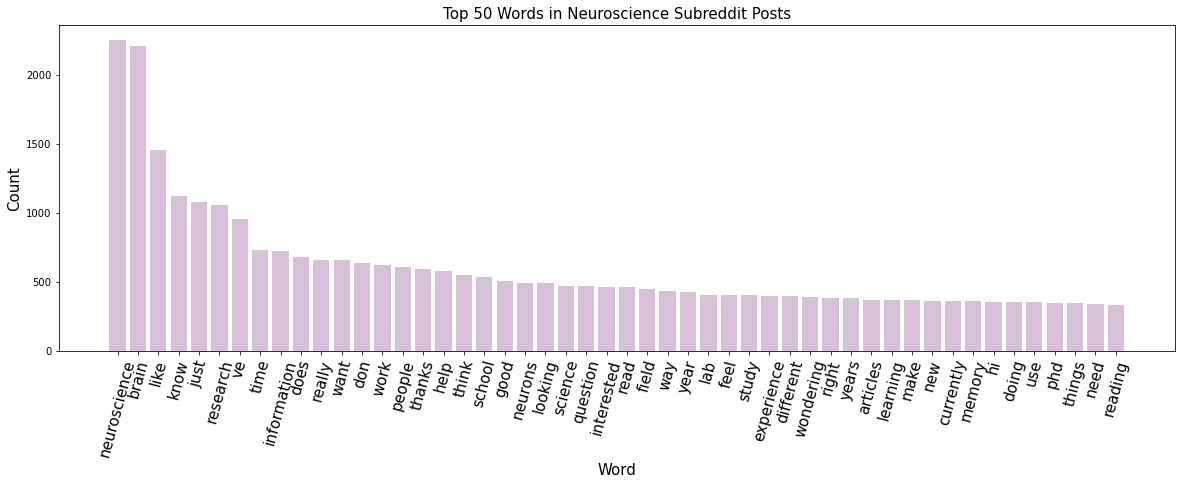

In [308]:
#Top 50 post words from neuroscience subreddit posts:
temp_df = pd.DataFrame(eda_train[eda_train['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(50))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='thistle');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Word', fontsize=15);
plt.title('Top 50 Words in Neuroscience Subreddit Posts', fontsize=15);
plt.savefig('./visualizations/neur_post_uni_50.png', transparent=True, bbox_inches = 'tight')

- Above bar plot shows the top 50 unigrams from all collected post text from r/neuroscience subreddit.
- Top 6 words include 'neuroscience', 'just', 'like', 'research', 'know', and 'brain'.

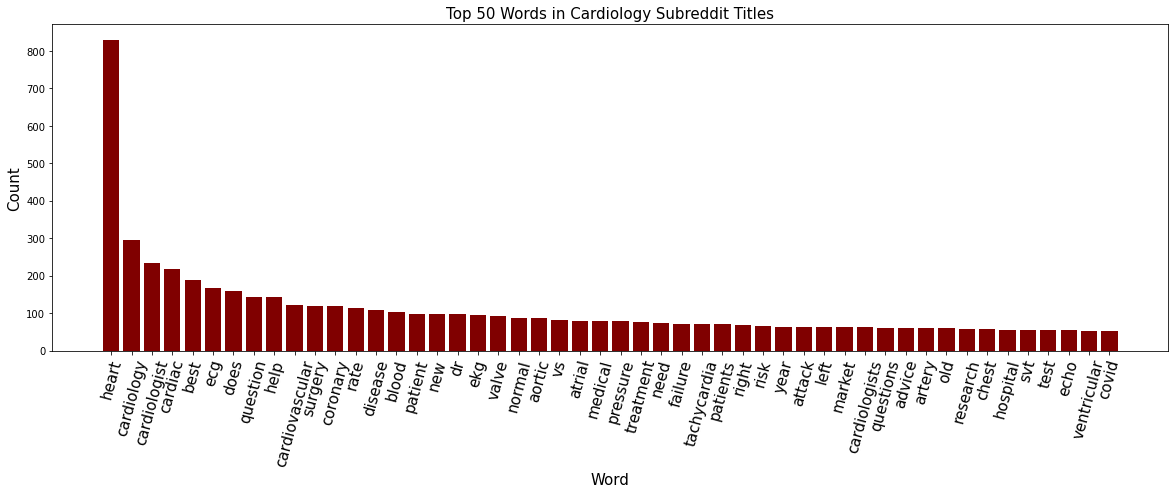

In [309]:
#Top 50 title words from Cardiology subreddit titles:
temp_df = pd.DataFrame(eda_train_ttl[eda_train_ttl['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(50))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='maroon');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Word', fontsize=15);
plt.title('Top 50 Words in Cardiology Subreddit Titles', fontsize=15);
plt.savefig('./visualizations/card_ttl_uni_50.png', transparent=True, bbox_inches = 'tight')

- Above bar plot shows the top 50 unigrams from all collected title text from r/Cardiology subreddit.
- Top 6 words include 'heart', 'cardiology', 'cardiac', 'best', 'ecg', and 'cardiologist'.

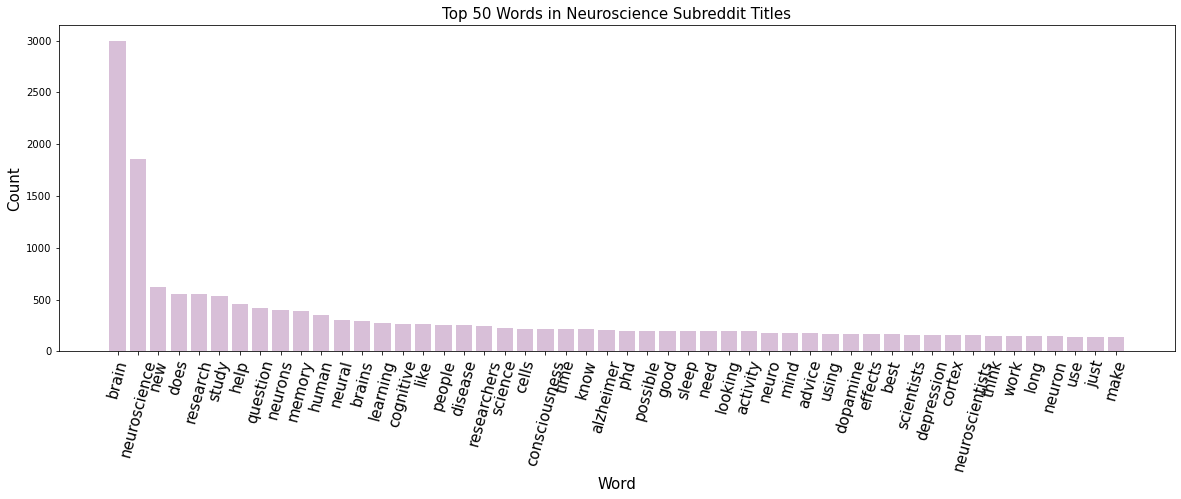

In [310]:
#Top 50 post words from Neuroscience subreddit titles:
temp_df = pd.DataFrame(eda_train_ttl[eda_train_ttl['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(50))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='thistle');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Word', fontsize=15);
plt.title('Top 50 Words in Neuroscience Subreddit Titles', fontsize=15);
plt.savefig('./visualizations/neur_ttl_uni_50.png', transparent=True, bbox_inches = 'tight')

- Above bar plot shows the top 50 unigrams from all collected title text from r/neuroscience subreddit.
- Top 6 words include 'brain', 'neuroscience', 'new', 'does', 'research', and 'study'.

In [65]:
#Instantiation, fitting, transforming, and df creation of CV to rank bigrams of self text:
cv3 = CountVectorizer(stop_words=new_words,ngram_range=(2,2))
a_cv3 = cv3.fit_transform(X_train)
df_cv3 = pd.DataFrame(a_cv3.A, columns= cv3.get_feature_names_out())
#Instantiation, fitting, transforming, and df creation of CV to rank bigrams of titles:
cv3_ttl = CountVectorizer(stop_words=new_words,ngram_range=(2,2))
a_cv3_ttl = cv3_ttl.fit_transform(X_train_ttl)
df_cv3_ttl = pd.DataFrame(a_cv3_ttl.A, columns= cv3_ttl.get_feature_names_out())

In [66]:
#Recombinging subreddit categorization to continue bigram EDA by category:
eda_train2 = df_cv3
eda_train2['subreddit_real'] = list(y_train)
eda_train_ttl2 = df_cv3_ttl
eda_train_ttl2['subreddit_real'] = list(y_train_ttl)

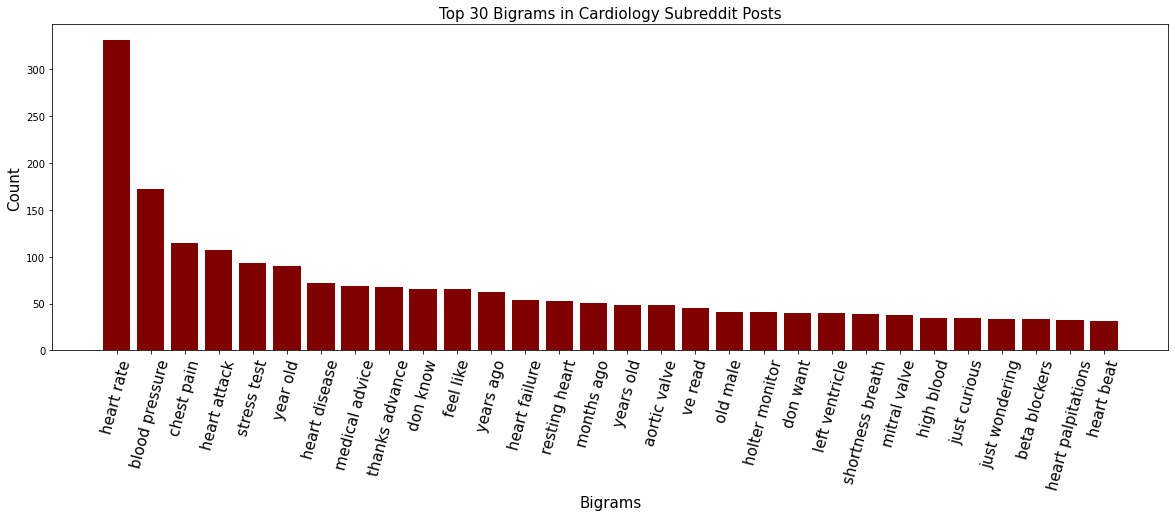

In [311]:
#Top 30 post BIGRAMS from Cardiology subreddit:
temp_df = pd.DataFrame(eda_train2[eda_train2['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='maroon');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Bigrams', fontsize=15);
plt.title('Top 30 Bigrams in Cardiology Subreddit Posts', fontsize=15);
plt.savefig('./visualizations/card_post_bi_30.png', transparent=True, bbox_inches = 'tight')

- Above bar plot shows the top 30 bigrams from all collected post text from r/Cardiology subreddit.
- Top 6 bigrams include 'heart rate', 'blood pressure', 'chest pain', 'heart attack', 'stress test', and 'year old'.

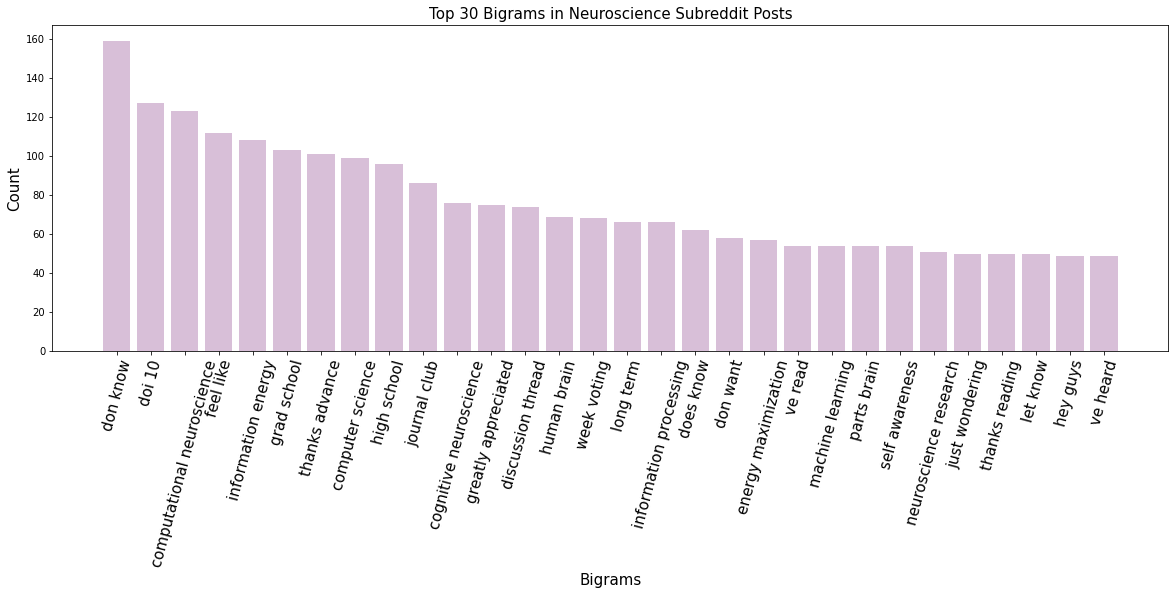

In [312]:
#Top 30 post BIGRAMS from Neuroscience subreddit:
temp_df = pd.DataFrame(eda_train2[eda_train2['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='thistle');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Bigrams', fontsize=15);
plt.title('Top 30 Bigrams in Neuroscience Subreddit Posts', fontsize=15);
plt.savefig('./visualizations/neur_post_bi_30.png', transparent=True, bbox_inches = 'tight')

- Above bar plot shows the top 30 bigrams from all collected post text from r/neuroscience subreddit.
- Top 6 bigrams include 'don know', 'doi 10', 'computational neuroscience', 'feel like', 'information energy', and 'grad school'.

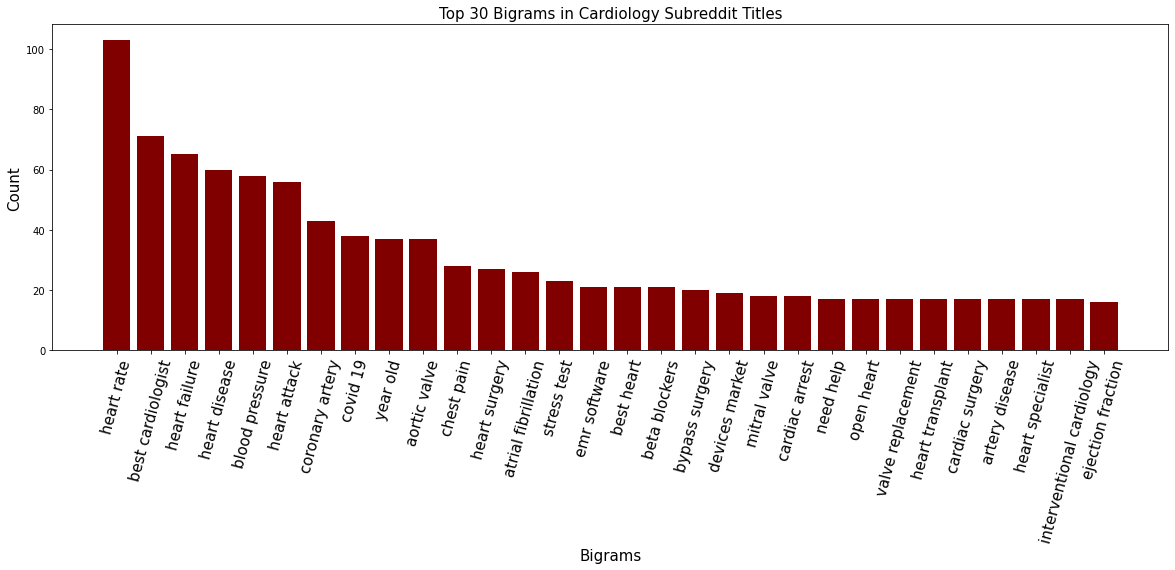

In [313]:
#Top 30 title BIGRAMS from Cardiology subreddit:
temp_df = pd.DataFrame(eda_train_ttl2[eda_train_ttl2['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='maroon');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Bigrams', fontsize=15);
plt.title('Top 30 Bigrams in Cardiology Subreddit Titles', fontsize=15);
plt.savefig('./visualizations/card_ttl_bi_30.png', transparent=True, bbox_inches = 'tight')

- Above bar plot shows the top 30 bigrams from all collected title text from r/Cardiology subreddit.
- Top 6 bigrams include 'heart rate', 'best cardiologist', 'heart failure', 'heart disease', 'blood pressure', and 'heart attack'.

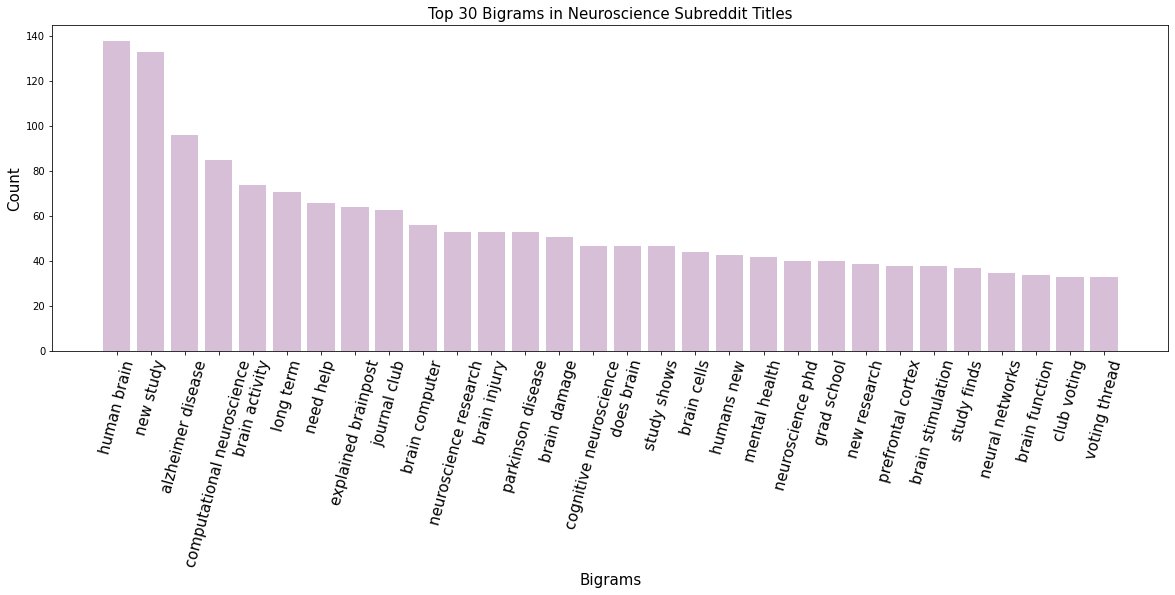

In [314]:
#Top 30 title BIGRAMS from Neuroscience subreddit titles:
temp_df = pd.DataFrame(eda_train_ttl2[eda_train_ttl2['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='thistle');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Bigrams', fontsize=15);
plt.title('Top 30 Bigrams in Neuroscience Subreddit Titles', fontsize=15);
plt.savefig('./visualizations/neur_ttl_bi_30.png', transparent=True, bbox_inches = 'tight')

- Above bar plot shows the top 30 bigrams from all collected title text from r/neuroscience subreddit.
- Top 6 bigrams include 'human brain', 'new study', 'alzheimers disease', 'computational neuroscience', 'brain activity', and 'long term'.

In [29]:
#Instantiation, fitting, transforming, and df creation of CV to rank bigrams of self text:
cv4 = CountVectorizer(stop_words=new_words,ngram_range=(3,3))
a_cv4 = cv4.fit_transform(X_train)
df_cv4 = pd.DataFrame(a_cv4.A, columns= cv4.get_feature_names_out())

#Instantiation, fitting, transforming, and df creation of CV to rank bigrams of titles:
cv4_ttl = CountVectorizer(stop_words=new_words,ngram_range=(3,3))
a_cv4_ttl = cv4_ttl.fit_transform(X_train_ttl)
df_cv4_ttl = pd.DataFrame(a_cv4_ttl.A, columns= cv4_ttl.get_feature_names_out())

In [30]:
#Recombinging subreddit categorization to continue bigram EDA by category:
eda_train3 = df_cv4
eda_train3['subreddit_real'] = list(y_train)
eda_train_ttl3 = df_cv4_ttl
eda_train_ttl3['subreddit_real'] = list(y_train_ttl)

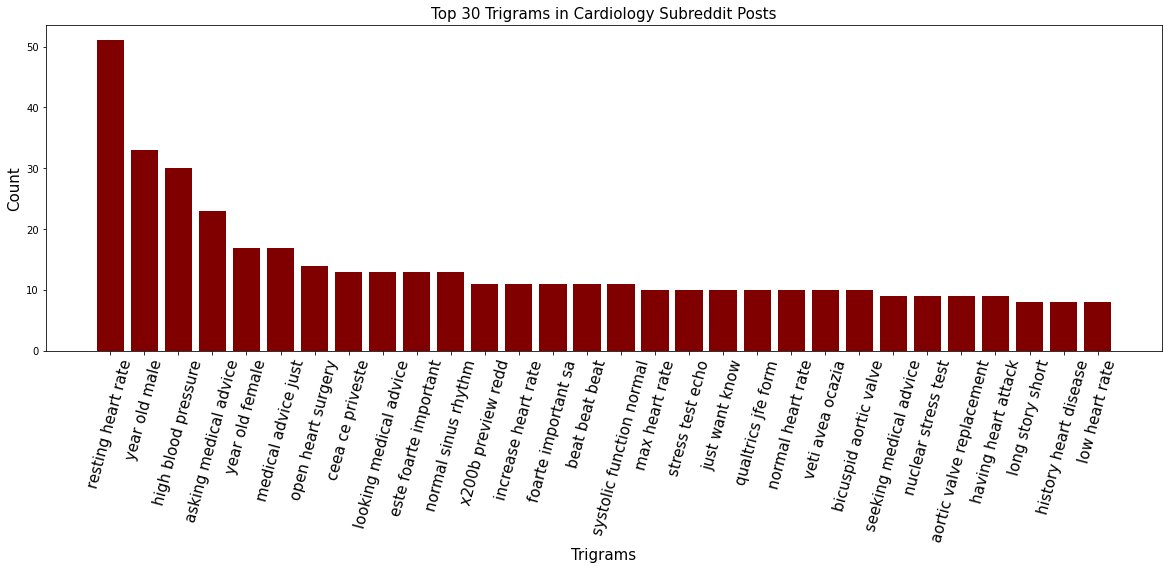

In [336]:
#Top 30 post TRIGRAMS from Cardiology subreddit:
temp_df = pd.DataFrame(eda_train3[eda_train3['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='maroon');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Trigrams', fontsize=15);
plt.title('Top 30 Trigrams in Cardiology Subreddit Posts', fontsize=15);

- Above bar plot shows the top 30 trigrams from all collected post text from r/Cardiology subreddit.
- Top 6 trigrams include 'resting heart rate', 'year old male', 'high blood pressure', 'asking medical advice', 'year old female', and 'medical advice just'.

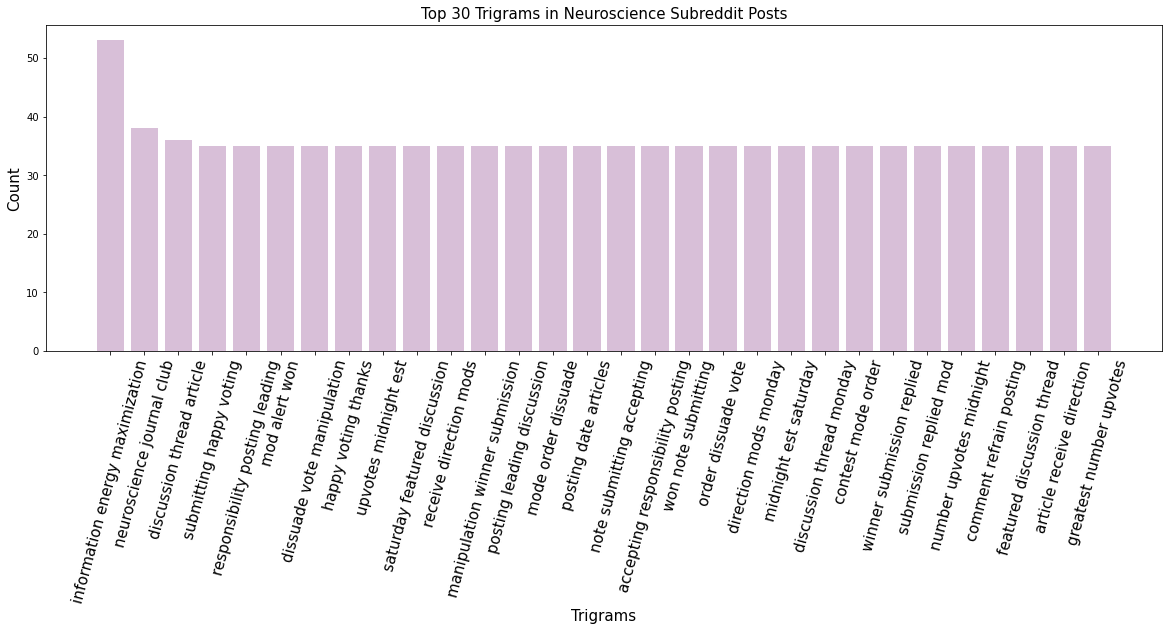

In [337]:
#Top 30 post TRIGRAMS from Neuroscience subreddit:
temp_df = pd.DataFrame(eda_train3[eda_train3['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,6))
plt.bar(temp_df['word'], height=temp_df[0], color='thistle');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Trigrams', fontsize=15);
plt.title('Top 30 Trigrams in Neuroscience Subreddit Posts', fontsize=15);

- Above bar plot shows the top 30 trigrams from all collected post text from r/neuroscience subreddit.
- Top 6 trigrams include 'information energy maximization', 'neuroscience journal club', 'discussion thread article', 'submitting happy voting', 'responsibility posting leading', and 'mod alert won'

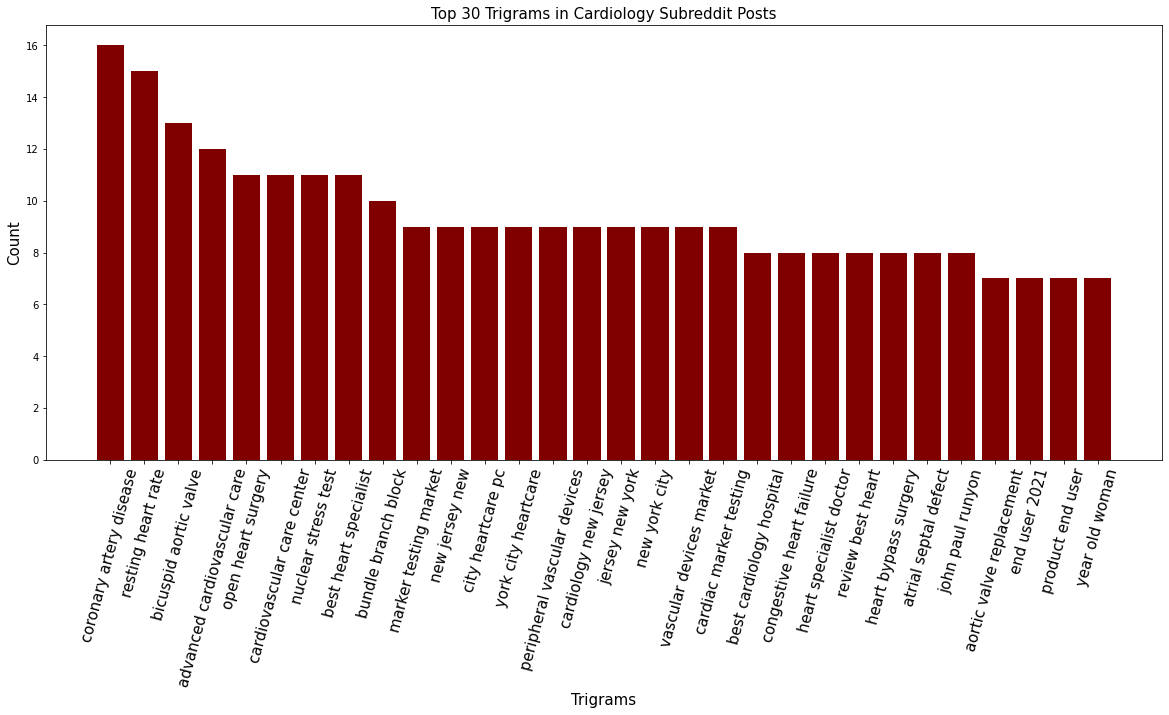

In [338]:
#Top 30 title TRIGRAMS from Cardiology subreddit:
temp_df = pd.DataFrame(eda_train_ttl3[eda_train_ttl3['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,8))
plt.bar(temp_df['word'], height=temp_df[0], color='maroon');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Trigrams', fontsize=15);
plt.title('Top 30 Trigrams in Cardiology Subreddit Posts', fontsize=15);

- Above bar plot shows the top 30 trigrams from all collected title text from r/Cardiology subreddit.
- Top 6 trigrams include 'coronary artery disease', 'resting heart rate', 'bicuspid aortic valve', 'advanced cardiovascular care', 'open heart surgery', and 'cardiovascular care center'

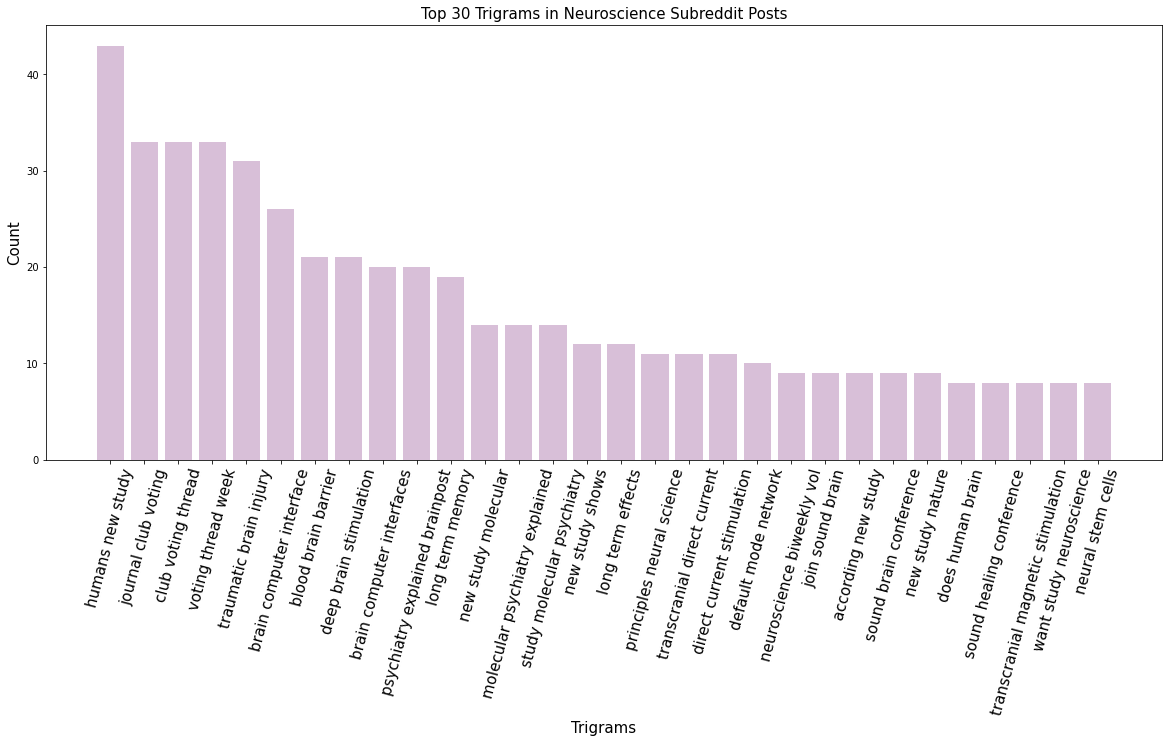

In [31]:
#Top 30 titles TRIGRAMS from Neuroscience subreddit:
temp_df = pd.DataFrame(eda_train_ttl3[eda_train_ttl3['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
temp_df['word'] = temp_df.index
plt.figure(figsize=(20,8))
plt.bar(temp_df['word'], height=temp_df[0], color='thistle');
plt.xticks(rotation=75, fontsize=15)
plt.ylabel('Count', fontsize=15);
plt.xlabel('Trigrams', fontsize=15);
plt.title('Top 30 Trigrams in Neuroscience Subreddit Posts', fontsize=15);

- Above bar plot shows the top 30 trigrams from all collected title text from r/neuroscience subreddit.
- Top 6 trigrams include 'humans new study', 'journal club voting', 'club voting thread','voting thread week', 'traumatic brain injury', and 'brain computer interface'.

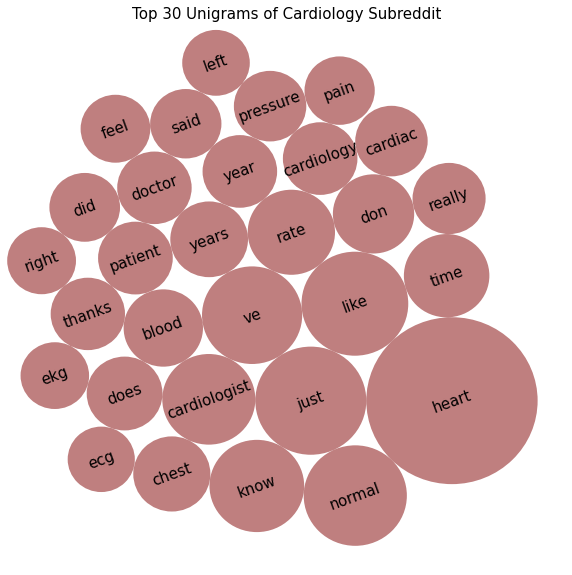

In [368]:
temp = pd.DataFrame(eda_train[eda_train['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
cardio_uni = pd.DataFrame()
cardio_uni['Word'] = temp.index
cardio_uni['Count'] =list(temp[0])
circles = circlify.circlify(cardio_uni['Count'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Top 30 Unigrams of Cardiology Subreddit', fontsize=15)
ax.axis('off')
lim = max(max(abs(circle.x) + circle.r,abs(circle.y) + circle.r,)for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
words = list(cardio_uni['Word'])
def Reverse(lst):
    lst.reverse()
    return lst
labels = Reverse(words)
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=.5, linewidth=2, facecolor="maroon", edgecolor=None))
    plt.annotate(label,(x,y ),fontsize=15, va='center',ha='center', rotation=20)
plt.savefig('./visualizations/card_uni_bubble.png', transparent=True)

- Bubble plot of 30 most common unigrams in cardiology subredddit posts. Essentially reiterates information of above bar plots, but non-linear.


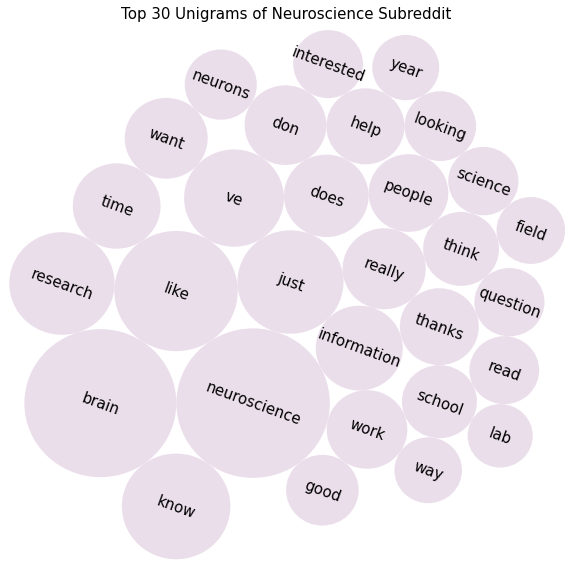

In [367]:
temp = pd.DataFrame(eda_train[eda_train['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(30))
neuro_uni = pd.DataFrame()
neuro_uni['Word'] = temp.index
neuro_uni['Count'] =list(temp[0])
circles = circlify.circlify(neuro_uni['Count'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Top 30 Unigrams of Neuroscience Subreddit', fontsize=15)
ax.axis('off')
lim = max(max(abs(circle.x) + circle.r,abs(circle.y) + circle.r,)for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
words = list(neuro_uni['Word'])
def Reverse(lst):
    lst.reverse()
    return lst
labels = Reverse(words)
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=.5, linewidth=2, facecolor="thistle", edgecolor=None))
    plt.annotate(label,(x,y ),fontsize=15, va='center',ha='center', rotation=-20)
plt.savefig('./visualizations/neur_uni_bubble.png', transparent=True)

- Bubble plot of 30 most common unigrams in neuroscience subredddit posts. Essentially reiterates information of above bar plots, but non-linear.


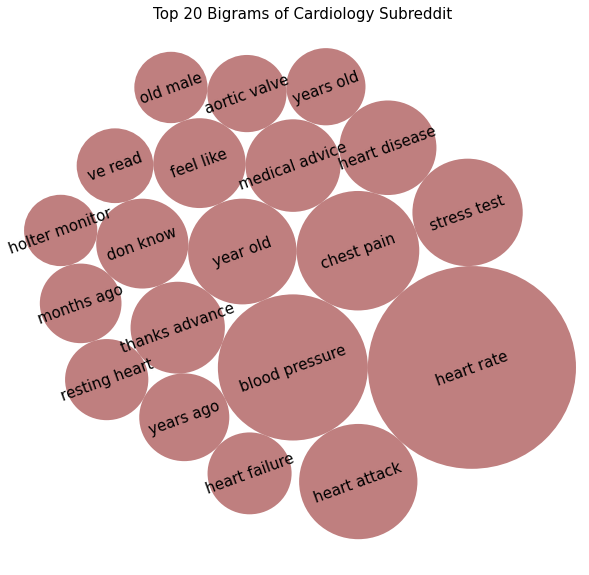

In [366]:
temp = pd.DataFrame(eda_train2[eda_train2['subreddit_real']=='Cardiology'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(20))
cardio_uni = pd.DataFrame()
cardio_uni['Word'] = temp.index
cardio_uni['Count'] =list(temp[0])
circles = circlify.circlify(cardio_uni['Count'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Top 20 Bigrams of Cardiology Subreddit', fontsize=15)
ax.axis('off')
lim = max(max(abs(circle.x) + circle.r,abs(circle.y) + circle.r,)for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
words = list(cardio_uni['Word'])
def Reverse(lst):
    lst.reverse()
    return lst
labels = Reverse(words)
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=.5, linewidth=2, facecolor="maroon", edgecolor=None))
    plt.annotate(label,(x,y ),fontsize=15, va='center',ha='center', rotation=20)
plt.savefig('./visualizations/card_bi_bubble.png', transparent=True)

- Bubble plot of 20 most common bigrams in cardiology subredddit posts. Essentially reiterates information of above bar plots, but non-linear.


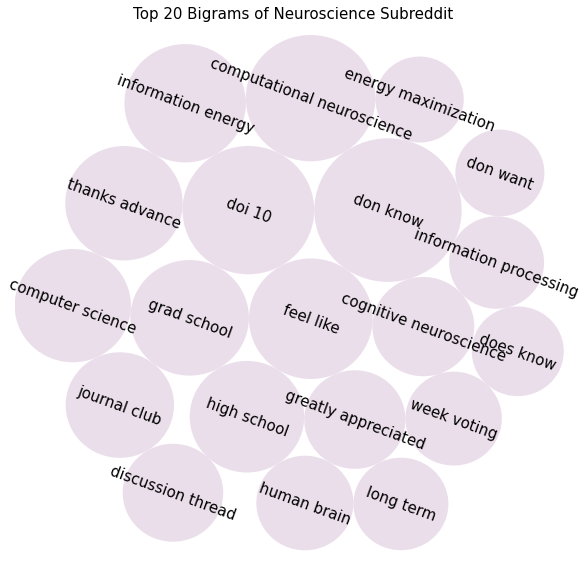

In [364]:
temp = pd.DataFrame(eda_train2[eda_train2['subreddit_real']=='neuroscience'].drop(columns=['subreddit_real']).sum().sort_values(ascending=False).head(20))
neuro_uni = pd.DataFrame()
neuro_uni['Word'] = temp.index
neuro_uni['Count'] =list(temp[0])
circles = circlify.circlify(neuro_uni['Count'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Top 20 Bigrams of Neuroscience Subreddit', fontsize=15)
ax.axis('off')
lim = max(max(abs(circle.x) + circle.r,abs(circle.y) + circle.r,)for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
words = list(neuro_uni['Word'])
def Reverse(lst):
    lst.reverse()
    return lst
labels = Reverse(words)
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=.5, linewidth=2, facecolor="thistle", edgecolor=None))
    plt.annotate(label,(x,y ),fontsize=15, va='center',ha='center',rotation=-20)
plt.savefig('./visualizations/neur_bi_bubble.png', transparent=True)

- Bubble plot of 20 most common unigrams in neuroscience subredddit posts. Essentially reiterates information of above bar plots, but non-linear.


In [136]:
#Scattertest visualization https://github.com/JasonKessler/scattertext
nlp = spacy.load("en_core_web_sm")

In [139]:
def term_freq(df_comb):
    corpus = (scattertext.CorpusFromPandas(df_comb,category_col='subreddit', text_col='title',nlp=nlp)
              .build().remove_terms(nlp.Defaults.stop_words, ignore_absences=True))
    df = corpus.get_term_freq_df()
    df['Cardiology_score'] = corpus.get_scaled_f_scores('Cardiology')
    df['neuroscience_score'] = corpus.get_scaled_f_scores('neuroscience')
    df['Cardiology_score'] = round(df['Cardiology_score'], 2)
    df['neuroscience_score'] = round(df['neuroscience_score'], 2)
    df_cardio = df.sort_values(by='Cardiology freq', ascending = False).reset_index()
    df_neuro = df.sort_values(by='neuroscience freq', ascending=False).reset_index()
    return df_cardio, df_neuro
cardio_freqs, neuro_freqs = term_freq(df_comb)

In [143]:
cardio_freqs.head(20)

,term,neuroscience freq,Cardiology freq,Cardiology_score,neuroscience_score
0,heart,3,371,1.00,0.00
1,question,266,156,0.85,0.15
2,/,353,151,0.11,0.89
3,cardiology,0,138,1.00,0.00
4,cardiac,0,98,1.00,0.00
5,help,201,90,0.11,0.89
6,rate,10,90,0.99,0.01
7,heart rate,2,82,1.00,0.00
8,ekg,0,76,1.00,0.00
9,cardiologist,0,75,1.00,0.00


In [142]:
#Generating interactive html file for scattertext plot:
corpus = (scattertext.CorpusFromPandas(df_comb,category_col='subreddit', text_col='title',nlp=nlp)
          .build().remove_terms(nlp.Defaults.stop_words, ignore_absences=True))
corpus_dataframe = df_comb[df_comb['subreddit'].str.contains('neuroscience|Cardiology', na=False)]
html = scattertext.produce_scattertext_explorer(corpus,category='neuroscience',category_name='neuroscience',
          not_category_name='Cardiology',width_in_pixels=1000)
open("./visualizations/sub_vis.html", 'wb').write(html.encode('utf-8'))

1094665

 ![ ](./visualizations/full_wo_words.png)

- Really amazing scattertext plot showing frequency and overlap of many terms. 
- Words in bottom right corner are most essentially of cardiology (e.g. 'echo','ecg', etc.), while word in top left corner are most essentially neuroscience (e.g.'eeg','brains', etc.). 
- Words in top right corner are those very common in both subreddits (e.g. 'research', 'help','advice', etc.), while words approaching the bottom left corner are those that are most rare but equally present in both subreddits (e.g. 'ai', 'fear', 'podcast', 'spike', etc.).
- Plot exists as an interactive html file in main repository.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Experimental Modeling:

In [77]:
#Estabilishing baseline:
y.value_counts(normalize=True)

neuroscience    0.645257
Cardiology      0.354743
Name: subreddit, dtype: float64

<br>
<br>

#### First I used GridSearch to compare count vectorization and TFIDF vectorization and narrow hyperparameters of each of these methods. 
#### When modeling with only the post text, count vectorization performed best (r2 : .944) with defaults on all parameters except max_df, which was found to be best at .25.
#### When modeling with only the title text, TFIDF vectorization performed best (r2 : .921) with defaults on all parameters except max_df, which was found to be best at .2.
#### Overall, the posts appear to be more useful in predictive modeling. 

In [32]:
#Train test split for eventual post based modeling:
X = df_comb['selftext']
y = df_comb['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, stratify=y)

#Train test split for eventual title based modeling:
X_ttl = df_comb_ttl['title']
y_ttl = df_comb_ttl['subreddit']
X_train_ttl, X_test_ttl, y_train_ttl, y_test_ttl = train_test_split(X_ttl, y_ttl, random_state=123, stratify=y_ttl)

#Defining stop words list:
new_words = text.ENGLISH_STOP_WORDS.union(['https','http','com','et','al','reddit','nih','gov','feed_text','nlm','nih','imgur','ncbi','epa',
                                           'hashtag','en','source','org','wiki','wikipedia', 'www','youtube','watch','pmc','amp','auto','webp','__eep__'])

In [33]:
#N_gram Range GridSearch on SelfText set with CV and LR:
pipe1 = Pipeline([('cv', CountVectorizer(stop_words=new_words)),('lr', LogisticRegression())])
params = {'cv__ngram_range' : [(1,1),(1,2),(1,3)], 'cv__max_df': [.2,.25]}
gs1 = GridSearchCV(pipe1, param_grid=params, n_jobs=-1)
gs1.fit(X_train, y_train)
gs1.score(X_train,y_train), gs1.score(X_test,y_test)

(0.9962185668368312, 0.9438775510204082)

In [80]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs1.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs1.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs1.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.8785942492012779
PRECISION SCORE: 0.9598603839441536
F1 SCORE: 0.9174311926605504


In [81]:
#n_grams default, default min_df, and max_df of .25 returns the best score:
#Too much tinkering with min_df caused failures:
gs1.best_params_

{'cv__max_df': 0.25, 'cv__ngram_range': (1, 1)}

In [82]:
#N_gram Range GridSearch on Title set with CV and LR:
#SelfText set performs better so far:
params = {'cv__ngram_range' : [(1,1),(2,2),(3,3),(1,2),(1,3),(2,3)], 'cv__max_df' : [.1,.15,.2,.25]}
gs1_ttl = GridSearchCV(pipe1, param_grid=params, n_jobs=-1)
gs1_ttl.fit(X_train_ttl, y_train_ttl)
gs1_ttl.score(X_train_ttl,y_train_ttl), gs1_ttl.score(X_test_ttl,y_test_ttl)

(0.9789896670493685, 0.9411055622524539)

In [83]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs1_ttl.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs1_ttl.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs1_ttl.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.9057507987220448
PRECISION SCORE: 0.9929947460595446
F1 SCORE: 0.9473684210526315


In [84]:
#n_grams default, default min_df, and max_df of .20 returns the best score in title set:
gs1_ttl.best_params_

{'cv__max_df': 0.2, 'cv__ngram_range': (1, 1)}

In [85]:
#GridSearch on post set with CV and LR:
pipe2 = Pipeline([('cv', TfidfVectorizer(stop_words=new_words)),('lr', LogisticRegression())])
params2 = {'cv__ngram_range' : [(1,1),(2,2),(3,3),(1,2),(1,3),(2,3)], 'cv__max_df' : [.2,.25,.3,.35,.4]}
gs2 = GridSearchCV(pipe2, param_grid=params2, n_jobs=-1)
gs2.fit(X_train, y_train)
gs2.score(X_train,y_train), gs1.score(X_test,y_test)

(0.9678578181130648, 0.9438775510204082)

In [86]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs2.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs2.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs2.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.8386581469648562
PRECISION SCORE: 0.9905660377358491
F1 SCORE: 0.9083044982698961


In [77]:
#Unigrams and max_df of .3 returns the best score:
gs2.best_params_

{'cv__max_df': 0.3, 'cv__ngram_range': (1, 1)}

In [138]:
#GridSearch on title set with CV and LR:
#SelfText set performs better so far:
params2 = {'cv__ngram_range' : [(1,1),(2,2),(3,3),(1,2),(1,3),(2,3)], 'cv__max_df' : [.2,.25,.3,.35]}
gs2_ttl = GridSearchCV(pipe2, param_grid=params2, n_jobs=-1)
gs2_ttl.fit(X_train_ttl, y_train_ttl)
gs2_ttl.score(X_train_ttl,y_train_ttl), gs2_ttl.score(X_test_ttl,y_test_ttl)

(0.9442594718714121, 0.9271568796280352)

In [139]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs2_ttl.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs2_ttl.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs2_ttl.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.7955271565495208
PRECISION SCORE: 0.996
F1 SCORE: 0.8845470692717585


In [102]:
#Unigrams only returns the best score:
gs2_ttl.best_params_

{'cv__max_df': 0.2, 'cv__ngram_range': (1, 1)}

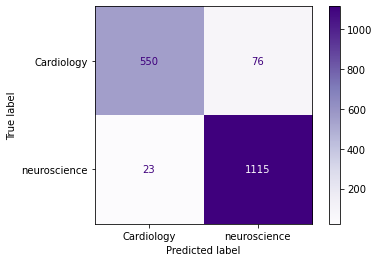

In [38]:
cmp = ConfusionMatrixDisplay.from_estimator(gs1, X_test, y_test, cmap='Purples');b

- Confusion Matrix showing the performance of grid searched count vectorized logistic regression model. 

<br>
<br>

#### Next, KNN classifier was checked with gridsearch again to narrow hyperparameters. This estimator performed much worse than logistic regression. Here, the TITLE set slightly outperformed the POST set in terms of predictive modeling significance, but STILL showed very poor overfit performance.
#### THE SCORE OF KNN MODELS WERE TOO WEAK TO WARRANT NOTING.

In [42]:
#GridSearch on post set with CV and KNN:
pipe3 = Pipeline([('cv', CountVectorizer(stop_words=new_words)),('knn', KNeighborsClassifier())])
params3 = {'cv__ngram_range' : [(1,1),(1,2),(1,3)], 'cv__max_df': [.1,.15,.2,.25]}
gs3 = GridSearchCV(pipe3, param_grid=params, n_jobs=-1)
gs3.fit(X_train, y_train)
gs3.score(X_train,y_train), gs3.score(X_test,y_test)

(0.838721875590849, 0.7426303854875284)

In [110]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs3.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs3.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs3.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.41054313099041534
PRECISION SCORE: 0.7514619883040936
F1 SCORE: 0.5309917355371901


In [43]:
#n_grams default, default min_df, and max_df of .25 again returns the best score:
gs3.best_params_

{'cv__max_df': 0.25, 'cv__ngram_range': (1, 1)}

In [111]:
#GridSearch on title set with CV and KNN:
#SelfText set performs better so far:
gs3_ttl = GridSearchCV(pipe3, param_grid=params3, n_jobs=-1)
gs3_ttl.fit(X_train_ttl, y_train_ttl)
gs3_ttl.score(X_train_ttl,y_train_ttl), gs3_ttl.score(X_test_ttl,y_test_ttl)

(0.9101607347876005, 0.8624074392973997)

In [112]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs3_ttl.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs3_ttl.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs3_ttl.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.7188498402555911
PRECISION SCORE: 0.9414225941422594
F1 SCORE: 0.8152173913043478


In [97]:
#n_grams default, default min_df, and max_df of .20 again returns the best score in title set:
gs3_ttl.best_params_

{'cv__max_df': 0.15, 'cv__ngram_range': (1, 1), 'knn__n_neighbors': 3}

<br>
<br>

#### Random forest classification peformed well on the TITLE set (R2 : .9397), but best on POST set (R2 : .9404). 
#### These were both strong, but neither of these were better than the scores of logistic regression on the post set.
#### BEST RANDOM FOREST CLASSIFIER SCORES: (R2: 0.9404 , RECALL SCORE: 0.867 , PRECISION SCORE: 0.961 , F1 SCORE: 0.912)

In [39]:
#GridSearch on post set with CV and RFC:
pipe4 = Pipeline([('cv', CountVectorizer(stop_words=new_words, max_df=.25)),('rfc', RandomForestClassifier())])
params4 = {'rfc__n_estimators': [100, 150, 200],'rfc__max_depth': [None, 5, 7, 10, 12, 15],'rfc__min_samples_split': [2, 3, 5]}
gs4 = GridSearchCV(pipe4, param_grid = params4, n_jobs=-1)
gs4.fit(X_train, y_train)
gs4.score(X_train,y_train), gs4.score(X_test,y_test)

(0.9967857818113065, 0.9404761904761905)

In [115]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs4.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs4.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs4.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.8674121405750799
PRECISION SCORE: 0.9610619469026549
F1 SCORE: 0.9118387909319899


In [107]:
#max_depth default, min_sample_split of 5, and default n_estimators returns the best score:
gs4.best_params_

{'rfc__max_depth': None, 'rfc__min_samples_split': 5, 'rfc__n_estimators': 100}

In [117]:
#GridSearch on title set with CV and RFC:
#SelfText set performs better so far:
gs4_ttl = GridSearchCV(pipe4, param_grid=params4, n_jobs=-1)
gs4_ttl.fit(X_train_ttl, y_train_ttl)
gs4_ttl.score(X_train_ttl,y_train_ttl), gs4_ttl.score(X_test_ttl,y_test_ttl)

(0.9917910447761195, 0.9397279145858447)

In [118]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs4_ttl.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs4_ttl.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs4_ttl.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.9233226837060703
PRECISION SCORE: 0.9459901800327333
F1 SCORE: 0.9345189975747779


In [106]:
#max_depth default, min_sample_split of 3, and n_estimator of 200 returns the best score in title set:
gs4_ttl.best_params_

{'rfc__max_depth': None, 'rfc__min_samples_split': 3, 'rfc__n_estimators': 200}

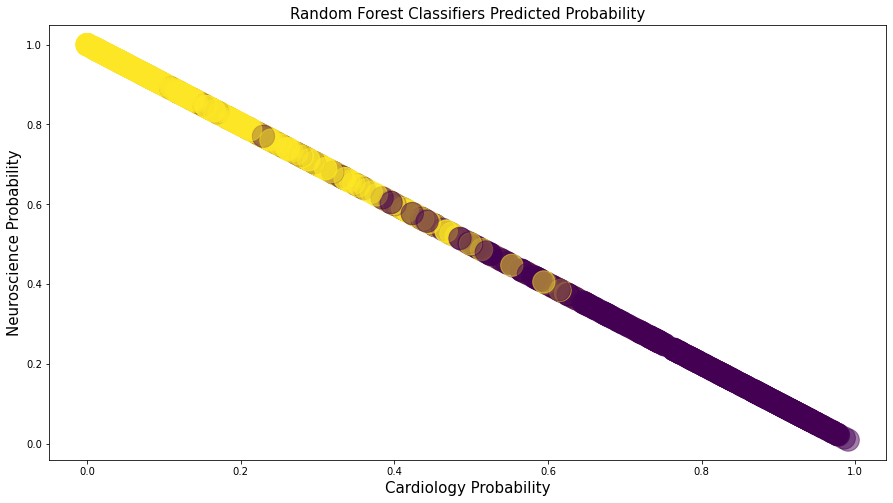

In [360]:
prob_plot = pd.DataFrame(gs4.predict_proba(X_test))
prob_plot['subreddit'] = list(y_test)
plt.figure(figsize=(15,8))
plt.scatter(prob_plot[0], prob_plot[1], s=500, alpha=.5,  c=prob_plot['subreddit'].astype('category').cat.codes);
plt.ylabel('Neuroscience Probability', fontsize=15);
plt.xlabel('Cardiology Probability', fontsize=15);
plt.title('Random Forest Classifiers Predicted Probability', fontsize=15);
plt.savefig('./visualizations/rfc_prob.png', transparent=True)

- Scatterplot of prediction probability values from random forest classifier showing extremeties and more blurred areas. This model alone is not the best performing, but later demomstrates use value as part of an ensemble model.

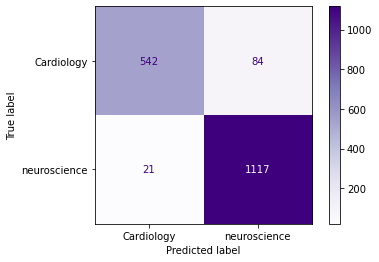

In [40]:
ConfusionMatrixDisplay.from_estimator(gs4, X_test, y_test, cmap='Purples');

- Confusion Matrix showing the performance of grid searched count vectorized random forest classifier model. 

<br>
<br>

#### Using multinomial naive bayes returned an almost identical score to logistic regression. MNB performed best with default alpha.
#### BEST MULTINOMIAL NAIVE BAYES MODEL: (R2: 0.944 , RECALL SCORE: 0.901 , PRECISION SCORE: 0.938 , F1 SCORE: 0.919)

In [36]:
#GridSearch on post set with CV and MNB:
pipe5 = Pipeline([('cv', CountVectorizer(stop_words=new_words, max_df=.25)),('mnb', MultinomialNB())])
params5 = {'mnb__alpha': [1, 3, 5]}
gs5 = GridSearchCV(pipe5, param_grid = params5, n_jobs=-1)
gs5.fit(X_train, y_train)
gs5.score(X_train,y_train), gs5.score(X_test,y_test)

(0.9676687464549064, 0.9438775510204082)

In [108]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs5.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs5.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs5.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.9009584664536742
PRECISION SCORE: 0.9384359400998337
F1 SCORE: 0.9193154034229829


In [115]:
#max_depth default, min_sample_split of 5, and default n_estimators returns the best score:
gs5.best_params_

{'mnb__alpha': 1}

In [43]:
#GridSearch on title set with CV and MNB:
#SelfText set performs better so far:
pipe5 = Pipeline([('cv', CountVectorizer(stop_words=new_words, max_df=.25)),('mnb', MultinomialNB())])
params5 = {'mnb__alpha': [1, 3, 5]}
gs5_ttl = GridSearchCV(pipe5, param_grid=params5, n_jobs=-1)
gs5_ttl.fit(X_train_ttl, y_train_ttl)
gs5_ttl.score(X_train_ttl,y_train_ttl), gs5_ttl.score(X_test_ttl,y_test_ttl)

(0.968828932261768, 0.944377475460651)

In [106]:
print('RECALL SCORE: ' + str(recall_score(y_test, gs5_ttl.predict(X_test), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, gs5_ttl.predict(X_test), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, gs5_ttl.predict(X_test), pos_label='Cardiology')))

RECALL SCORE: 0.8738019169329073
PRECISION SCORE: 0.9750445632798574
F1 SCORE: 0.9216512215669755


In [117]:
#max_depth default, min_sample_split of 3, and n_estimator of 200 returns the best score in title set:
gs5_ttl.best_params_

{'mnb__alpha': 1}

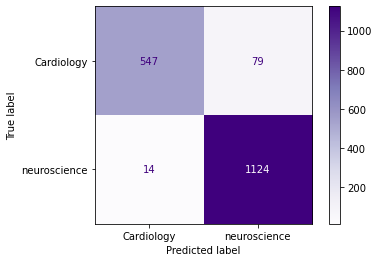

In [44]:
ConfusionMatrixDisplay.from_estimator(gs5_ttl, X_test, y_test, cmap='Purples');

- Confusion Matrix showing the performance of grid searched count vectorized naive bayes model. 

<br>
<br>

#### Next, I experimented a bit with using a voting regressor to combine the more successful estimators and hyperparameters from the above gridsearching. Here I found that hard voting with equal weight on all estimators (Logistic Regression, Random Forest, and Multinomial Naive Bayes) except for more weight on naive bayes returned the highest score yet.
#### BEST VOTING CLASSIFIER MODEL: (R2: 0.952 , RECALL SCORE: 0.893 , PRECISION SCORE: 0.969 , F1 SCORE: 0.929) 


In [46]:
cv6 = CountVectorizer(stop_words=new_words, max_df=.25)
X_train_cv = cv6.fit_transform(X_train)
X_test_cv = cv6.transform(X_test)

In [79]:
#Best voting classifier without weights:
vc7 = VotingClassifier(estimators=[('lr', LogisticRegression()),('rfc', RandomForestClassifier(min_samples_split= 5)),
                                   ('mnb', MultinomialNB())], voting='hard', n_jobs=-1)
vc7.fit(X_train_cv.A, y_train)
vc7.score(X_train_cv.A,y_train), vc7.score(X_test_cv.A,y_test)

(0.9958404235205143, 0.9518140589569161)

In [103]:
print('RECALL SCORE: ' + str(recall_score(y_test, vc7.predict(X_test_cv.A), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, vc7.predict(X_test_cv.A), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, vc7.predict(X_test_cv.A), pos_label='Cardiology')))

RECALL SCORE: 0.8929712460063898
PRECISION SCORE: 0.9688041594454073
F1 SCORE: 0.9293433083956774


In [47]:
#Best voting classifier with weights:
vc10 = VotingClassifier(estimators=[('lr', LogisticRegression()),('rfc', RandomForestClassifier(min_samples_split= 5)),
                                    ('mnb', MultinomialNB())],weights=[.25,.25,.5], voting='hard', n_jobs=-1)
vc10.fit(X_train_cv.A, y_train)
vc10.score(X_train_cv.A,y_train), vc10.score(X_test_cv.A,y_test)

(0.9846851956891662, 0.9529478458049887)

In [90]:
print('RECALL SCORE: ' + str(recall_score(y_test, vc10.predict(X_test_cv.A), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, vc10.predict(X_test_cv.A), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, vc10.predict(X_test_cv.A), pos_label='Cardiology')))

RECALL SCORE: 0.9345047923322684
PRECISION SCORE: 0.936
F1 SCORE: 0.9352517985611511


In [ ]:
# #Unsatisfactory Results: (0.995273208546039, 0.9501133786848073)
# vc = VotingClassifier(estimators=[('lr', LogisticRegression()),('knn', KNeighborsClassifier()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())],voting='hard', n_jobs=-1)
# vc.fit(X_train_cv.A, y_train)
# vc.score(X_train_cv.A,y_train), vc.score(X_test_cv.A,y_test)

In [ ]:
# #Unsatisfactory Results: (0.9878994138778597, 0.9450113378684807)

# vc2 = VotingClassifier(estimators=[('lr', LogisticRegression()),('knn', KNeighborsClassifier()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())], voting='soft', n_jobs=-1)
# vc2.fit(X_train_cv.A, y_train)
# vc2.score(X_train_cv.A,y_train), vc2.score(X_test_cv.A,y_test)

In [ ]:
# #Unsatisfactory Results: (0.9954622802041974, 0.9506802721088435)
# vc3 = VotingClassifier(estimators=[('lr', LogisticRegression()),('knn', KNeighborsClassifier()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())], voting='hard', weights=[.3,.1,.3,.3], n_jobs=-1)
# vc3.fit(X_train_cv.A, y_train)
# vc3.score(X_train_cv.A,y_train), vc3.score(X_test_cv.A,y_test)

In [124]:
# #Unsatisfactory Results: (0.9831726224238987, 0.9291383219954649)
# vc4 = VotingClassifier(estimators=[('lr', LogisticRegression()),('knn', KNeighborsClassifier()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())],
#                                    voting='hard', weights=[.1,.3,.3,.3], n_jobs=-1)
# vc4.fit(X_train_cv.A, y_train)
# vc4.score(X_train_cv.A,y_train), vc4.score(X_test_cv.A,y_test)

In [125]:
# #Unsatisfactory Results: (0.9824163357912649, 0.9331065759637188)
# vc5 = VotingClassifier(estimators=[('lr', LogisticRegression()),('knn', KNeighborsClassifier()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())],
#                                    voting='hard', weights=[.3,.3,.1,.3], n_jobs=-1)
# vc5.fit(X_train_cv.A, y_train)
# vc5.score(X_train_cv.A,y_train), vc5.score(X_test_cv.A,y_test)

In [126]:
# #Unsatisfactory Results: (0.996596710153148, 0.9365079365079365)
# vc6 = VotingClassifier(estimators=[('lr', LogisticRegression()),('knn', KNeighborsClassifier()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())],
#                                    voting='hard', weights=[.3,.3,.3,.1], n_jobs=-1)
# vc6.fit(X_train_cv.A, y_train)
# vc6.score(X_train_cv.A,y_train), vc6.score(X_test_cv.A,y_test)

In [ ]:
# #Unsatisfactory Results: (0.9964076384949896, 0.9478458049886621)
# vc8 = VotingClassifier(estimators=[('lr', LogisticRegression()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())],weights=[.5,.25,.25], voting='hard', n_jobs=-1)
# vc8.fit(X_train_cv.A, y_train)
# vc8.score(X_train_cv.A,y_train), vc8.score(X_test_cv.A,y_test)

In [ ]:
# #Unsatisfactory Results: (0.9971639251276234, 0.9472789115646258)
# vc9 = VotingClassifier(estimators=[('lr', LogisticRegression()),
#                                   ('rfc', RandomForestClassifier(min_samples_split= 5)),('mnb', MultinomialNB())],weights=[.25,.5,.25], voting='hard', n_jobs=-1)
# vc9.fit(X_train_cv.A, y_train)
# vc9.score(X_train_cv.A,y_train), vc9.score(X_test_cv.A,y_test)

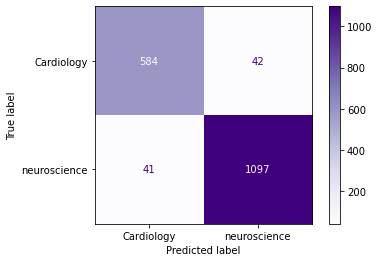

In [48]:
ConfusionMatrixDisplay.from_estimator(vc10, X_test_cv, y_test, cmap='Purples');

- Confusion Matrix showing the performance of grid searched count vectorized voting classified model consisting of unevenly weighted logistic regression, random forest, and naive bayes estimators. This ensemble model is the best performing model. 

<br>
<br>

#### Finally, I tried ADA Boost Classifier with n_estimators set to 200 and got good score, but still not as good as the voting classifier found above. 
#### BEST ADA BOOST CLASSIFIER SCORES: (R2: 0.933 , RECALL SCORE: 0.859 , PRECISION SCORE: 0.946 , F1 SCORE: 0.900)

In [49]:
abc = AdaBoostClassifier(random_state=42, n_estimators=200)
abc.fit(X_train_cv.A,y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [170]:
# n_estimators=100 : (0.9398752127056155, 0.9251700680272109)
# n_estimators=200: (0.9669124598222727, 0.9325396825396826)
abc.score(X_train_cv.A,y_train),abc.score(X_test_cv.A,y_test)

(0.9669124598222727, 0.9325396825396826)

In [171]:
print('RECALL SCORE: ' + str(recall_score(y_test, abc.predict(X_test_cv.A), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, abc.predict(X_test_cv.A), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, abc.predict(X_test_cv.A), pos_label='Cardiology')))

RECALL SCORE: 0.8594249201277955
PRECISION SCORE: 0.945518453427065
F1 SCORE: 0.9004184100418409


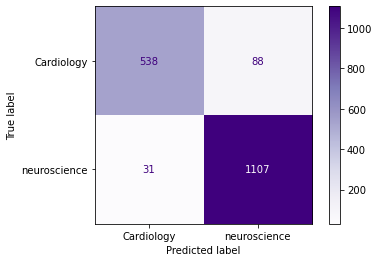

In [50]:
ConfusionMatrixDisplay.from_estimator(abc, X_test_cv, y_test, cmap='Purples');

- Confusion Matrix showing the performance of grid searched count vectorized ADABoost classifier model. This model performs worse that the prior ensemble model.


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Investigating Residuals from Strongest Model:

In [102]:
residuals = pd.DataFrame(X_test)
residuals['Subreddit'] = y_test
residuals['Predictions'] = vc10.predict(X_test_cv.A)

In [107]:
pd.options.display.max_rows = 85
pd.options.display.max_colwidth = 500
residuals[residuals['Subreddit'] != residuals['Predictions']]

,selftext,Subreddit,Predictions
10603,"looking for most common examples that you would use in a ELI5 (that means to lay ppl, those dont know anything about any of this)\n\nhttps://en.wikipedia.org/wiki/Limen",neuroscience,Cardiology
1973,"Hi! Anyone can send me this article?\n\nhttps://doi.org/10.1016/j.jacc.2020.03.084\n\nImpossible with sci-hub, only visible first page, the other white...😞\n\nThanks in advance!",Cardiology,neuroscience
10060,"I'm curious if there's any new developments on what HPPD is and why only some people get it, last I checked I was under the impression that nobody knows anything about it.",neuroscience,Cardiology
8004,"I'm working on a research project and unfortunately I'm having trouble getting data. My project centers around Heart Rate data and movement disorders, but HD patients are pretty rare around these parts. \n\nIf any of you work with HD patients, it would be an absolute lifesaver if we could get in touch, I submit the necessary documentation, and you collect heart rate data. I only need around 15 minutes of EKG data per patient. \n\nThis is probably a longshot, but what the hell.",neuroscience,Cardiology
11645,"Every protocol I look at just says ""overnight""",neuroscience,Cardiology
658,"I have a handful of programs I am looking at very very closely. But in general I would be happy going to any fellowship in any part of the country (suburban, urban, rural) and in any setting (academic, community). I am honestly very appreciative of connections that I have received for research but at this point I would like to connect with PDs and sell myself. Lol, I'm joking (not really)",Cardiology,neuroscience
11802,Im going through a very hard break up and haven't been able to sleep properly. I've noticed that on the days were i slept about 3 ir 4 hours my hability to cope with the situation is harder. Can you explain me why? And any remedies?,neuroscience,Cardiology
16725,"Most people get a typical hangover, and I used to too, but for the last few years the day after drinking is just amazing! It only lasts exactly one day and then I'm back to my normal self. I'm usually anti-social and don't really like talking to people but on this day, my anti-hangover day, I actually LIKE socializing.\n\nThis has been consistently happening every time I drink for the last 3 years, (which is around the same time I started experimenting with zero carb diets and calorie restri...",neuroscience,Cardiology
3342,Much appreciated,Cardiology,neuroscience
12059,using PDE inhibitors ‎C8H10N4O2 that stop the inactivation of cAMP / cGMP thus allowing for increased sodium channel opening &amp; Na/Ca ATPase exchange with mg2+ as a cofactor. so the extent of extra cellular Ca2+ or Na+ shapes the response of calcium / sodium influx or efflux causing the cell to still hyperpolarize if the calcium is influxing? &amp; depolarize if the sodium is influxing?,neuroscience,Cardiology


Of post from the cardiology subreddit that were misidentified, many contained words that should have made them clearly of the cardiology subreddit.
- These words include, ECGs, Angiomethod, vascular, ASD, shunting, blood, rhythm, electromagnetic, defibrilator, arrhythmia, hypertension, capillary, and cardiothoracic.

Of the posts from the neuroscience subreddit that were misidentified, many contained words that should have made them clearly of the neuroscience subreddit.
- These words include HPPD, sleep, anti-social, PDE, C8H10N402, cAMP/cGMP, mg2+, EEG, cAMP, axons, nerves, panic, panic attacks, 2000Hz, neurotransmitters, nerves, dream, dreamt, headache, brain damage,ADHD, ADHDers, neurologist, MRI, mechanoreceptors, ANS, spinal, and neurosurgeon.

A number of posts contain words like stroke or research that really confuse the model largely because both of these pertain deeply to both fields.

#### I suspect that these misclassifications may improve by adjusting max df or incorporating lemmatization

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Adjustments in Response to Residual Investigation:

In [145]:
#CV with default max_df:
cv7 = CountVectorizer(stop_words=new_words)
X_train_cv2 = cv7.fit_transform(X_train)
X_test_cv2 = cv7.transform(X_test)

In [146]:
#Changing max_df only removed 1 feature (word):
X_train_cv2.shape, X_train_cv.shape

((5289, 26481), (5289, 26480))

In [380]:
#Changing max_df slightly improved overall performance. 
vc11 = VotingClassifier(estimators=[('lr', LogisticRegression()),('rfc', RandomForestClassifier(min_samples_split= 5)),
                                    ('mnb', MultinomialNB())],weights=[.25,.25,.5], voting='soft', n_jobs=-1)
vc11.fit(X_train_cv2.A, y_train)
vc11.score(X_train_cv2.A,y_train), vc11.score(X_test_cv2.A,y_test)

(0.9778786159954623, 0.9478458049886621)

In [140]:
print('RECALL SCORE: ' + str(recall_score(y_test, vc11.predict(X_test_cv2.A), pos_label='Cardiology')))
print('PRECISION SCORE: ' + str(precision_score(y_test, vc11.predict(X_test_cv2.A), pos_label='Cardiology')))
print('F1 SCORE: ' + str(f1_score(y_test, vc11.predict(X_test_cv2.A), pos_label='Cardiology')))

RECALL SCORE: 0.9361022364217252
PRECISION SCORE: 0.9361022364217252
F1 SCORE: 0.9361022364217252


In [370]:
# #Lemmatization returns a worse score (0.985063339005483, 0.9478458049886621):
# def lemma_tokenizer(doc):
#     wnl = WordNetLemmatizer()
#     return [wnl.lemmatize(w) for w in word_tokenize(doc)]
# cv8 = CountVectorizer(stop_words=new_words, tokenizer=lemma_tokenizer)
# X_train_cv3 = cv8.fit_transform(X_train)
# X_test_cv3 = cv8.transform(X_test)
# vc12 = VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),('rfc', RandomForestClassifier(min_samples_split= 5)),
#                                     ('mnb', MultinomialNB())],weights=[.25,.25,.5], voting='hard', n_jobs=-1)
# vc12.fit(X_train_cv3.A, y_train)
# vc12.score(X_train_cv3.A,y_train), vc12.score(X_test_cv3.A,y_test)

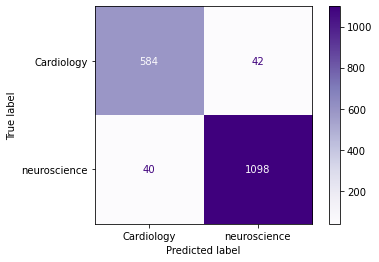

In [55]:
#Removing max_df parameter removed two misclassifications:
cmd = ConfusionMatrixDisplay.from_estimator(vc11, X_test_cv2, y_test, cmap='Purples');

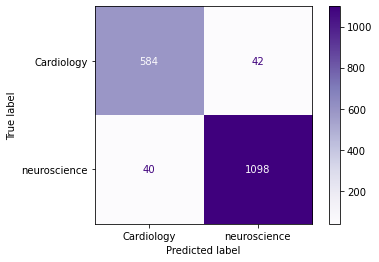

In [62]:
cmd.plot(cmap=plt.cm.Purples);
cmd.figure_.savefig('./visualizations/best_cmd.png',transparent=True)

- After a slight tweak to the first ensemble model, this is the confusion matrix of the improved best performing model.
- This model is a count vectorized voting classified model consisting of unevenly weighted logistic regression, random forest, and naive bayes estimators. 
- This ensemble model is the best performing model. 

In [372]:
balanced_accuracy_score(y_test, vc11.predict(X_test_cv2.A))

0.949677703723252

In [376]:
#Estabilishing baseline:
y_test.value_counts(normalize=True)

neuroscience    0.645125
Cardiology      0.354875
Name: subreddit, dtype: float64

- In terms of the best models accuracy, 95.4 % of all observations are correctly predicted.
- In terms of our models balanced accuracy, 94.9% .....
- In terms of our best models precision, 93.6% of predicted positives are correctly predicted.
- In terms of our best models misclassification Rate, 4.6% of all predictions are misclassification.
- In terms of our best models sensitivity, 93.6% of actual positives are accurately predicted.
- In terms of our best models specificty, 93.2 % actual negatives are correctly predicted.
# ...all of which vastly outperform the baseline.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Recommendations:

###  Subreddits, as a initial sources of community language, prove to be exceptionally strong source datasets for creating models that accurately predict and classify research community discourse. 

### Furthermore, misclassification seem to occur because post content has nothing to do with either neuroscience or cardiology (e.g. "hello"), because a strong word of one discipline outweighs a weaker word from another (e.g. "blood" is stronger than "mri"), or because the only keywords a post contains are words that are heavily used by both communities (e.g. "stroke", "research", etc.) It is in these middle confusion areas where the greatest potential for future classification analyis or future departmental intersectionality perhaps can be found.  

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Sources:

- https://www.reddit.com/r/Cardiology/

- https://www.reddit.com/r/neuroscience/

- https://github.com/JasonKessler/scattertext

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>